In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("data.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
X = df.iloc[:, 3:13]
y = df.iloc[:, 13]

In [4]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [5]:
## Concatenate the Data Frames
X=pd.concat([X,geography,gender],axis=1)

In [6]:
## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [7]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [8]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [10]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))

In [11]:
# Adding the second hidden layer
classifier.add(Dense(units = 6,kernel_initializer = 'he_uniform',activation='relu'))


In [12]:
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))


In [13]:
classifier.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [32]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [34]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)
                            

Epoch 1/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4806 - accuracy: 0.7959 - val_loss: 0.4665 - val_accuracy: 0.7959
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4509 - accuracy: 0.7998 - val_loss: 0.4479 - val_accuracy: 0.8027
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4356 - accuracy: 0.8100 - val_loss: 0.4380 - val_accuracy: 0.8111
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4262 - accuracy: 0.8160 - val_loss: 0.4299 - val_accuracy: 0.8156
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4184 - accuracy: 0.8173 - val_loss: 0.4231 - val_accuracy: 0.8167
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4113 - accuracy: 0.8222 - val_loss: 0.4171 - val_accuracy: 0.8183
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4043 - accuracy: 0.8229 - val_loss: 0.4121 - val_accuracy: 0.8232

Epoch 58/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3293 - accuracy: 0.8625 - val_loss: 0.3576 - val_accuracy: 0.8550
Epoch 59/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3288 - accuracy: 0.8623 - val_loss: 0.3570 - val_accuracy: 0.8527
Epoch 60/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3292 - accuracy: 0.8625 - val_loss: 0.3570 - val_accuracy: 0.8538
Epoch 61/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3296 - accuracy: 0.8612 - val_loss: 0.3571 - val_accuracy: 0.8531
Epoch 62/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3292 - accuracy: 0.8636 - val_loss: 0.3581 - val_accuracy: 0.8557
Epoch 63/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3286 - accuracy: 0.8630 - val_loss: 0.3589 - val_accuracy: 0.8519
Epoch 64/100
536/536 [==============================] - 1s 3ms/step - loss: 0.3287 - accuracy: 0.8615 - val_loss: 0.3590 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


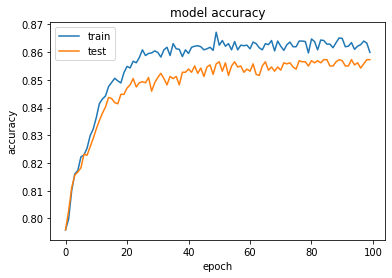

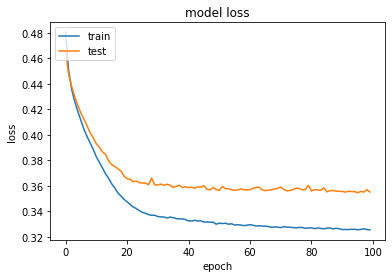

In [35]:
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [36]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [40]:
print("Model Score:",score * 100)

Model Score: 86.1
